Классификация вин


In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:

import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [0]:
np.random.permutation(5)  # Будем использовать для шаффлинга датасета

array([2, 0, 1, 4, 3])

In [0]:
class WineNet(torch.nn.Module):
    def __init__(self, n):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, n)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n, n)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n, 3)
        self.sm = torch.nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
    
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
    def fit(self, X_train, y_train, X_test=None, y_test=None):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        loss = torch.nn.CrossEntropyLoss()
        # CrossEntropyLoss использует не выходы после Softmax, 
        # а выходы нейронной сети до Softmax
       
        batch_size = 10

        for epoch in range(10000):
            order = np.random.permutation(X_train.shape[0])

            for start_index in range(0, X_train.shape[0], batch_size):
                optimizer.zero_grad()

                batch_indexes = order[start_index : start_index + batch_size]

                x_batch = X_train[batch_indexes]
                y_batch = y_train[batch_indexes]

                preds = net.forward(x_batch)

                loss_val = loss(preds, y_batch)
                loss_val.backward()

                optimizer.step()
                
            if (X_test is not None) and (y_test is not None): 
                if epoch % 100 == 0:
                    test_preds = net.forward(X_test)
                    test_preds = test_preds.argmax(dim=1)  
                    # Берем argmax чтобы понять к какому классу каждый семпл предсказала нейросеть 
                    print((test_preds == y_test).float().mean().item())
        return self

In [0]:
net = WineNet(5)

In [0]:
net.fit(X_train, y_train, X_test, y_test)

0.40740740299224854
0.3888888955116272
0.5
0.42592594027519226
0.5
0.5
0.5555555820465088
0.5555555820465088
0.5925925970077515
0.6851851940155029
0.6666666865348816
0.6851851940155029
0.6851851940155029
0.6851851940155029
0.6851851940155029
0.6851851940155029
0.7222222089767456
0.7222222089767456
0.7222222089767456
0.7592592835426331
0.7777777910232544
0.8148148059844971
0.8518518805503845
0.8333333134651184
0.8333333134651184
0.8333333134651184
0.8333333134651184
0.8333333134651184
0.8333333134651184
0.8333333134651184
0.8333333134651184
0.8518518805503845
0.8518518805503845
0.8518518805503845
0.8518518805503845
0.8518518805503845
0.8518518805503845
0.8518518805503845
0.8518518805503845
0.8518518805503845
0.8703703880310059
0.8703703880310059
0.8703703880310059
0.8888888955116272
0.8518518805503845
0.8518518805503845
0.8703703880310059
0.8518518805503845
0.8703703880310059
0.8518518805503845
0.8703703880310059
0.8518518805503845
0.8703703880310059
0.8518518805503845
0.870370388031005

WineNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=5, out_features=3, bias=True)
  (sm): Softmax()
)

# Визуализация

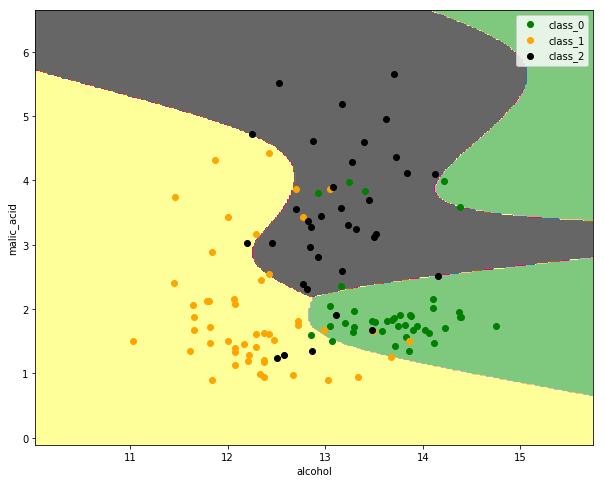

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()